In [1]:
# Needed for adding my version of py_etherscan_api package on personal Mac
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/')

In [2]:
import etherscan.accounts as accounts
import pandas as pd
import json

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.offline import plot
from plotly.graph_objs import Scatter, Data, Box, Bar
from plotly.graph_objs import Scattergl
init_notebook_mode() # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

%matplotlib inline
import matplotlib as plt
# import cufflinks as cf
# cf.set_config_file(offline=True, world_readable=True, theme='ggplot')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Pull transactions

In [4]:
with open('../api_key.json', 'r') as key_file:
    key = json.loads(key_file.read())['key']

In [5]:
api = accounts.Account(address="0x55d34b686aa8C04921397c5807DB9ECEdba00a4c", api_key=key)

In [6]:
transactions = api.get_all_transactions()
df = pd.DataFrame(transactions)
df.value = df.value.astype(float)/ 1000000000000000000
df.timeStamp = pd.to_datetime(df.timeStamp, unit='s')
df.blockNumber = df.blockNumber.astype(int)

page 1 added
page 2 added
page 3 added
page 4 added
page 5 added
page 6 added
page 7 added
page 8 added
page 9 added
page 10 added
Total number of transactions: 97189


In [7]:
df.to_pickle('status_pickle.p')

## Grab Internal Transactions

In [8]:
transactions = api.get_all_transactions(internal=True)
df_int = pd.DataFrame(transactions)
df_int.value = df_int.value.astype(float)/ 1000000000000000000
df_int.timeStamp = pd.to_datetime(df_int.timeStamp, unit='s')
df_int.blockNumber = df_int.blockNumber.astype(int)

page 1 added
page 2 added
page 3 added
page 4 added
page 5 added
Total number of transactions: 40010


In [9]:
# Only take successful internal value transfers
df_int = df_int[(df_int.isError == '0') & (df_int.value > 0)]
df_int.head()

,blockNumber,contractAddress,errCode,from,gas,gasUsed,hash,input,isError,timeStamp,to,traceId,type,value
6,3903900,,,0xcc89405e3cfd38412093840a3ac2f851dd395dfb,161423,0,0xaf850c7b9f681e81e8f6b122658f1f42ee4bf428dad3...,,0,2017-06-20 15:51:31,0x55d34b686aa8c04921397c5807db9ecedba00a4c,0,call,3244.894891
7,3903900,,,0x55d34b686aa8c04921397c5807db9ecedba00a4c,2300,0,0xaf850c7b9f681e81e8f6b122658f1f42ee4bf428dad3...,,0,2017-06-20 15:51:31,0x2fdfdc48b4ca0021e4c629f137d151b5910e6cd0,0_1,call,500.000000
8,3903900,,,0x55d34b686aa8c04921397c5807db9ecedba00a4c,2300,0,0xaf850c7b9f681e81e8f6b122658f1f42ee4bf428dad3...,,0,2017-06-20 15:51:31,0xcc89405e3cfd38412093840a3ac2f851dd395dfb,0_2,call,2744.894891
10,3903901,,,0x55d34b686aa8c04921397c5807db9ecedba00a4c,2300,0,0x85ba04d202869e21adc569f447a736de0b1036d00c67...,,0,2017-06-20 15:52:09,0x2fdfdc48b4ca0021e4c629f137d151b5910e6cd0,1,call,5999.050000
11,3903901,,,0x55d34b686aa8c04921397c5807db9ecedba00a4c,2300,0,0xf055c55e92f4047427cfc12b503c5e8395a818e3e4de...,,0,2017-06-20 15:52:09,0x2fdfdc48b4ca0021e4c629f137d151b5910e6cd0,1,call,249.000000


In [10]:
df_int.loc[(df_int['to'] != '0x2fdfdc48b4ca0021e4c629f137d151b5910e6cd0'), 'value'] = [-value for value in df_int.loc[(df_int['to'] != '0x2fdfdc48b4ca0021e4c629f137d151b5910e6cd0'), 'value'].values]


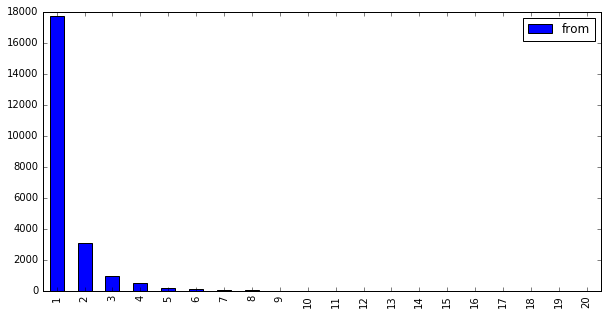

In [42]:
num_attempts = pd.DataFrame(df[(df.isError == '0') & (df.value > 0)]['from'].value_counts()).reset_index()
num_multiple = len(num_attempts[num_attempts['from'] > 1])
pd.DataFrame(num_attempts['from'].value_counts()).sort_index().plot(kind='bar', figsize=(10,5))

## Amount and Length kicked back from Dynamic Ceiling Caps

In [11]:
print("Amount Accepted: {}".format(df_int.loc[(df_int['to'] != '0x2fdfdc48b4ca0021e4c629f137d151b5910e6cd0')].value.sum()))
print("Number Accounts: {}".format(df_int.loc[(df_int['to'] != '0x2fdfdc48b4ca0021e4c629f137d151b5910e6cd0')].value.count()))

Amount Accepted: -347154.72868632444
Number Accounts: 11161


## Amount and Length Accepted from Dynamic Ceiling Caps

In [12]:
print("Amount Accepted: {}".format(df_int.loc[(df_int['to'] == '0x2fdfdc48b4ca0021e4c629f137d151b5910e6cd0')].value.sum()))
print("Number Accounts: {}".format(df_int.loc[(df_int['to'] == '0x2fdfdc48b4ca0021e4c629f137d151b5910e6cd0')].value.count()))

Amount Accepted: 299897.83999999997
Number Accounts: 28660


## Clean them up

In [13]:
icoFirstTxBlock = 3903900
icoLastTxBlock =  3908029

In [24]:
mask1 = (df_int.isError == '0')
mask2 = (df_int.value < 0)
df_int.head()

,blockNumber,contractAddress,errCode,from,gas,gasUsed,hash,input,isError,timeStamp,to,traceId,type,value
6,3903900,,,0xcc89405e3cfd38412093840a3ac2f851dd395dfb,161423,0,0xaf850c7b9f681e81e8f6b122658f1f42ee4bf428dad3...,,0,2017-06-20 15:51:31,0x55d34b686aa8c04921397c5807db9ecedba00a4c,0,call,-3244.894891
7,3903900,,,0x55d34b686aa8c04921397c5807db9ecedba00a4c,2300,0,0xaf850c7b9f681e81e8f6b122658f1f42ee4bf428dad3...,,0,2017-06-20 15:51:31,0x2fdfdc48b4ca0021e4c629f137d151b5910e6cd0,0_1,call,500.000000
8,3903900,,,0x55d34b686aa8c04921397c5807db9ecedba00a4c,2300,0,0xaf850c7b9f681e81e8f6b122658f1f42ee4bf428dad3...,,0,2017-06-20 15:51:31,0xcc89405e3cfd38412093840a3ac2f851dd395dfb,0_2,call,-2744.894891
10,3903901,,,0x55d34b686aa8c04921397c5807db9ecedba00a4c,2300,0,0x85ba04d202869e21adc569f447a736de0b1036d00c67...,,0,2017-06-20 15:52:09,0x2fdfdc48b4ca0021e4c629f137d151b5910e6cd0,1,call,5999.050000
11,3903901,,,0x55d34b686aa8c04921397c5807db9ecedba00a4c,2300,0,0xf055c55e92f4047427cfc12b503c5e8395a818e3e4de...,,0,2017-06-20 15:52:09,0x2fdfdc48b4ca0021e4c629f137d151b5910e6cd0,1,call,249.000000


In [25]:
test1 = df.loc[(df.isError == '0') & (df.value > 0),['from','value']].groupby('from').sum().reset_index()
test2 = df_int.loc[mask1 & (df_int.value != 0),['to','value',]].groupby('to').sum().reset_index()
kickbacked = pd.merge(test1, test2,left_on='from', right_on='to')
# kickbacked['value'] = kickbacked.value_x + kickbacked.value_y

In [26]:
fulfilled = pd.merge(df[(df.isError == '0') & (df.value > 0)], kickbacked, on='from', how='outer', indicator=True).query('_merge == "left_only"').drop(['_merge'], axis=1)

In [27]:
fulfilled.head()

,blockHash,blockNumber,confirmations,contractAddress,cumulativeGasUsed,from,gas,gasPrice,gasUsed,hash,input,isError,nonce,timeStamp,to_x,transactionIndex,value,value_x,to_y,value_y
0,0xe26835700cd697a556780758119c336d9dcaba937fd3...,3903901,33972,,1100010,0xa65e9fec4f892ef6e9fe3888ed9b0eb6aab1f0fd,500000,500604713730,137010,0x85ba04d202869e21adc569f447a736de0b1036d00c67...,0x,0,113,2017-06-20 15:52:09,0x55d34b686aa8c04921397c5807db9ecedba00a4c,5,5999.05,NaN,NaN,NaN
1,0xe26835700cd697a556780758119c336d9dcaba937fd3...,3903901,33972,,1216336,0xfb6494df0cf00f566feba0f2389ea16c4838e290,200000,500000000000,116326,0xf055c55e92f4047427cfc12b503c5e8395a818e3e4de...,0x,0,5,2017-06-20 15:52:09,0x55d34b686aa8c04921397c5807db9ecedba00a4c,6,249.00,NaN,NaN,NaN
8,0xe26835700cd697a556780758119c336d9dcaba937fd3...,3903901,33972,,2255176,0x5b8d84105a7a1c34ed556e835a37be4d6c535463,200000,200000000000,116326,0xe37d2f55b5a3490b5fc225ee4bc3658ec1bc182d779f...,0x,0,1,2017-06-20 15:52:09,0x55d34b686aa8c04921397c5807db9ecedba00a4c,16,275.00,NaN,NaN,NaN
9,0x23cda3a9c08029ff34701b8137b3e4dd233468859670...,3903902,33971,,137010,0x007c5b29b40ed7fd691b0cd2430751f9e4831697,210000,1000000000000,137010,0x0242264016707ae2273c681c0524ec92fe8fe8eb4b6b...,0x,0,0,2017-06-20 15:52:22,0x55d34b686aa8c04921397c5807db9ecedba00a4c,0,2000.00,NaN,NaN,NaN
10,0x207376a5935eba4b4bc35d8b43a3563979438aeeadab...,3903903,33970,,4369238,0x0080cdc66a5a0d17745de6e12fbc5fecb6b5460a,200000,250000000000,137010,0xe415939051ca87a36aa3be1c4a204dfa09579f192cf7...,0x,0,2,2017-06-20 15:52:48,0x55d34b686aa8c04921397c5807db9ecedba00a4c,25,2999.90,NaN,NaN,NaN


In [28]:
kickbacked['value'] = kickbacked.value_x + kickbacked.value_y

In [29]:
total_eth_contrib = fulfilled.value.sum() + kickbacked.value.sum()
total_eth_reported = 299902.24
total_eth_reported - total_eth_contrib

559.08822227607016

In [30]:
total_supply = total_eth_contrib * 10000 / (0.41 + (.1 - 0.0692894026))
total_supply 

6792283951.0490055

In [31]:
# Reported numbers
tot_supply_reported = 6804870174.878168246198837603
reserve_alloc = 1973412350.714668791397662905
sgt_alloc = 471505389.187865805561407178
coredev_alloc = 1360974034.97563364923976752

In [32]:
print("reserve perc: {}".format(reserve_alloc / tot_supply_reported))
print('sgt perc:     {}'.format(sgt_alloc/tot_supply_reported))
print('core dee perc {}'.format(coredev_alloc/tot_supply_reported))    

reserve perc: 0.29
sgt perc:     0.0692894026
core dee perc 0.2


In [33]:
.41 + (.1 - 0.0692894026)

0.44071059739999996

In [34]:
len(kickbacked['from'].unique()) + len(fulfilled['from'].unique())

22773

In [47]:
# Check total of successful ETH transactions
cleared = df[(df.isError == '0')]
cleared_nz = cleared[cleared.value != 0]
cleared_nz.count()

blockHash            32102
blockNumber          32102
confirmations        32102
contractAddress      32102
cumulativeGasUsed    32102
from                 32102
gas                  32102
gasPrice             32102
gasUsed              32102
hash                 32102
input                32102
isError              32102
nonce                32102
timeStamp            32102
to                   32102
transactionIndex     32102
value                32102
dtype: int64

## Exploration

## Number of Transactions per Block

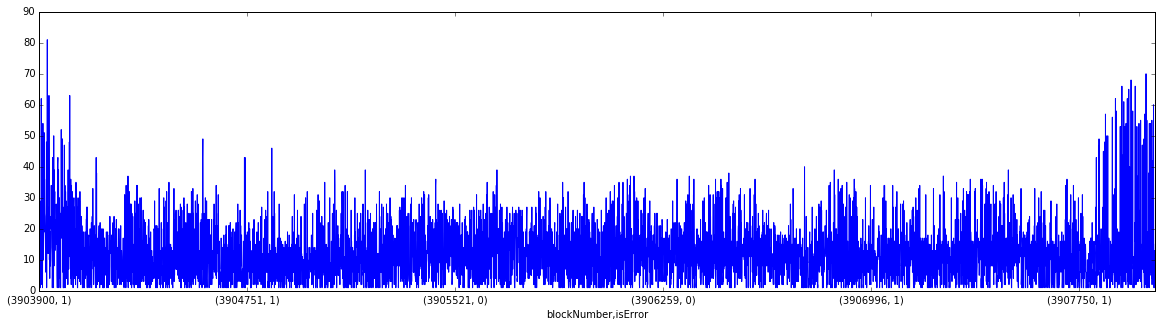

In [143]:
df[(df.blockNumber >= icoFirstTxBlock) & (df.blockNumber <= icoLastTxBlock)].groupby(['blockNumber','isError']).size().plot(figsize=(20,5))

In [48]:
combined_df = pd.concat([kickbacked, fulfilled])
combined_df.head()
# size_df = pd.DataFrame(df[(df.value != 0) & (df.isError == '0')].groupby('from').size())

,blockHash,blockNumber,confirmations,contractAddress,cumulativeGasUsed,from,gas,gasPrice,gasUsed,hash,...,isError,nonce,timeStamp,to,to_x,to_y,transactionIndex,value,value_x,value_y
0,NaN,NaN,NaN,NaN,NaN,0x0000144de471f4cb630e6a00fa0c25d78245e645,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,0x0000144de471f4cb630e6a00fa0c25d78245e645,NaN,NaN,NaN,2.500000,6.600000,-4.100000
1,NaN,NaN,NaN,NaN,NaN,0x000039fadc0e48bdbca90b1da643db1e56b320fb,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,0x000039fadc0e48bdbca90b1da643db1e56b320fb,NaN,NaN,NaN,4.261447,4.855595,-0.594148
2,NaN,NaN,NaN,NaN,NaN,0x00017689c4adb8a5680f14291e1fd646cc401a2d,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,0x00017689c4adb8a5680f14291e1fd646cc401a2d,NaN,NaN,NaN,3.109198,4.000000,-0.890802
3,NaN,NaN,NaN,NaN,NaN,0x0001d1cd4aab89b18df05f3061af743df4a919a8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,0x0001d1cd4aab89b18df05f3061af743df4a919a8,NaN,NaN,NaN,11.711034,754.660000,-742.948966
4,NaN,NaN,NaN,NaN,NaN,0x0001fe7648a2c144becdf9f17f0055315a519f86,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,0x0001fe7648a2c144becdf9f17f0055315a519f86,NaN,NaN,NaN,0.000000,2.000000,-2.000000


In [35]:
combined = pd.concat([kickbacked, fulfilled])

In [51]:
combined.value.sum()

299343.15177772398

In [52]:
def label_exp_group(value):
    labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
    for label in labels:
        if value <= 10**float(label):
            return label
        
combined['exp_group'] = combined.value.apply(label_exp_group)

In [64]:
combined[combined.exp_group == '5'][['from','value']]

,from,value
1739,0x2840c1162114780f3b617b030621022571c2bcb0,25000.0
7947,0xfe5fb336166cc6e55af9ae922ebc952f3de42327,25000.0
11,0x00ac1c84d1d0a2eaf6e8f504c7c96e6e82cb6333,29999.9
14,0x00d3b51fe558ee09c3ba4f9a3eb10053f855b2eb,11757.0


In [65]:
combined[combined.exp_group == '4'][['from','value']]

,from,value
0,0xa65e9fec4f892ef6e9fe3888ed9b0eb6aab1f0fd,5999.05
9,0x007c5b29b40ed7fd691b0cd2430751f9e4831697,2000.00
10,0x0080cdc66a5a0d17745de6e12fbc5fecb6b5460a,2999.90
15,0x00e3fd9efefafdd1032b2540c02d45aa68c3d587,5000.00
38,0x2d0efca5e73e90c7707931678dfaef38c068ac10,1500.00
90,0xeb68aa2764b4a9a943658b2e61db4c902b2ebf85,7692.99


In [53]:
grouped = pd.DataFrame(combined.groupby('exp_group').sum())
grouped = grouped[['value']]
grouped_size = pd.DataFrame(combined.groupby('exp_group').size())
grouped['size'] = grouped_size[0].values
grouped['size_perc'] = [trans / len(combined) * 100 for trans in grouped['size'].values]
grouped['value_perc'] = [value / grouped.value.sum() * 44.07105974 for value in grouped.value.values]

In [54]:
grouped[['size','size_perc','value','value_perc']]

,size,size_perc,value,value_perc
exp_group,,,,
0,8614,32.854037,3842.906476,0.565775
1,12879,49.120867,50284.239677,7.403142
2,4659,17.769556,115756.970032,17.042422
3,57,0.217400,12510.195593,1.841825
4,6,0.022884,25191.940000,3.708906
5,4,0.015256,91756.900000,13.508991


In [156]:
trace = go.Bar( 
    y=grouped.value_perc,
    name='Total ETH'
)
trace2 = go.Bar( 
    y=grouped.size_perc,
    name='Addresses',
)
data = Data([trace, trace2])
layout = go.Layout(
    xaxis=go.XAxis(
        title='Investor Group',
        ticktext = [
                "$0 < x < 10^0$",
                "$10^0 < x < 10^1$",
                "$10^1 < x < 10^2$",
                "$10^2 < x < 10^3$",
                "$10^3 < x < 10^4$",
                "$10^4 < x < 10^5$",
                "$10^5 < x < 10^6$",
                "Exchange"
            ],
        tickvals = [ 0, 1, 2, 3, 4, 5,6 ],
        tickfont=dict(
            size=40,
            color='black'
        ),
        titlefont=dict(
            size=50,
            color='black'
        ),
    ),
    yaxis=go.YAxis(
        title='Percentage',
        tickfont=dict(
            size=40,
            color='black'
        ),
        titlefont=dict(
            size=50,
            color='black'
        ),
    ),
    legend=dict(
        x=0,
        y=1,
        font=dict(
            size=40,
            color='black'
        ),
    ),
    height=1500,
    width=3000,
     margin={
        'b': 400,
        'l': 200
    },
#    barmode='stack'
)
fig = go.Figure(data=data, layout=layout)

iplot(fig)
# py.iplot(fig, filename='Status_investor_percentage_breakdown')

In [33]:
df[(df.isError == '0') & (df.value > 0) & (df.value <= 1)].value.sum()

4764.1901929536134

In [34]:
df[(df.isError == '0') & (df.value > 0) & (df.value <= 1)]['from'].count()

7802

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



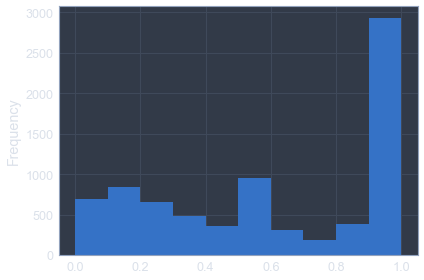

In [32]:
df[(df.isError == '0') & (df.value > 0) & (df.value <= 1)].value.plot.hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



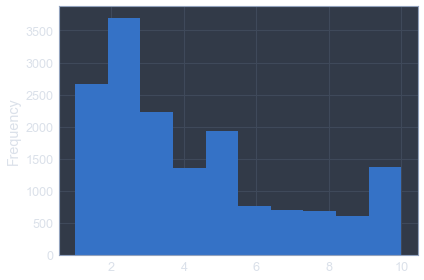

In [38]:
df[(df.isError == '0') & (df.value > 1) & (df.value <= 10)].value.plot.hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



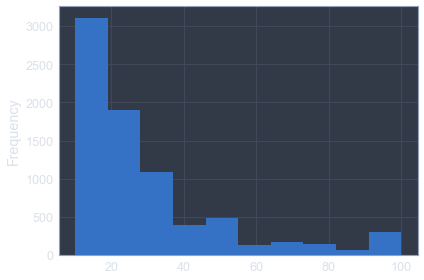

In [41]:
df[(df.isError == '0') & (df.value > 10) & (df.value <= 100)].value.plot.hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



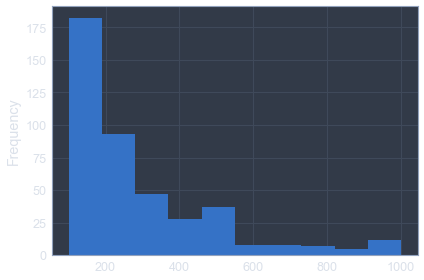

In [42]:
df[(df.isError == '0') & (df.value > 100) & (df.value <= 1000)].value.plot.hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



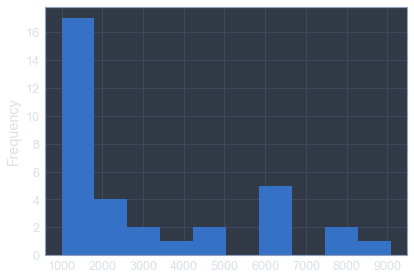

In [43]:
df[(df.isError == '0') & (df.value > 1000) & (df.value <= 10000)].value.plot.hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



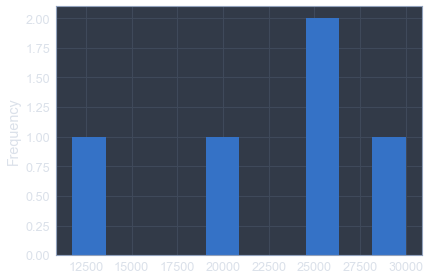

In [44]:
df[(df.isError == '0') & (df.value > 10000) & (df.value <= 100000)].value.plot.hist()